
# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. We have 14 columns in the dataset. The Patientid, Appointmentid, Gender, ‘ScheduledDay’ tells us on what day the patient set up their appointment, ‘Neighborhood’ indicates the location of the hospital, AppointmentDay, Neighbourhood, Age, ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família, Hipertension, Diabetics, Alcoholism, Handcap, SMS-Received and No-show. 
It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis

1. What are the factors that enable a patient show up for their schedule appointments?

2. Does their neighboourhood affect their inability to show up for their appointments?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In this stage of wrangling, It entails gathering, accessing and cleaning of the dataset. Here we selected the first 5 rows in order to access our dataset in order to access it and get it ready for cleaning.  


### General Properties


In [2]:
#load the dataset using pandas

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning

In this phase, I checked the number of rows and columns that are in the dataset using the shape method. There are 110527 rows and 14 columns. Next, I used the describe function to analysis the dataset. From the information, we could be noticed that The average age in the dataset is around 37years, Most of the patients dont have Hipertension, Diabetes, Alcoholism and Handcap. Most of them that are prone to this illness are the elderly ones. A very few patients have scholarship and do receive sms notifications.

In [3]:
#this is to check for the rows and columns in the dataset

df.shape

(110527, 14)

In [4]:
#this is to show the analysis of the dataset based on the minimum, maximum, and the different percentiles

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#this is to check for the presence of null values. Here, it is seen that there is no null values in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#here we check for duplicates. The dataset does not contain any duplicates.

df.duplicated().sum()

0

In [7]:
#convert column to lower case and also to replace some characters

df.rename(columns=lambda x: x.strip().lower().replace('-', '_'), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#dropping columns that are not needed. columns like the patientid, appointmentid, scheduledday, appointmentday

df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'], axis=1, inplace=True)
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

In Exploratory  Data Analysis, we used histogram to visualize each variable and bar charts to identify the relationships between variables. The information gotten here are used to answer questions of concern. 


### Research Question 1 What are the factors that enable a patient show up for their schedule appointments?

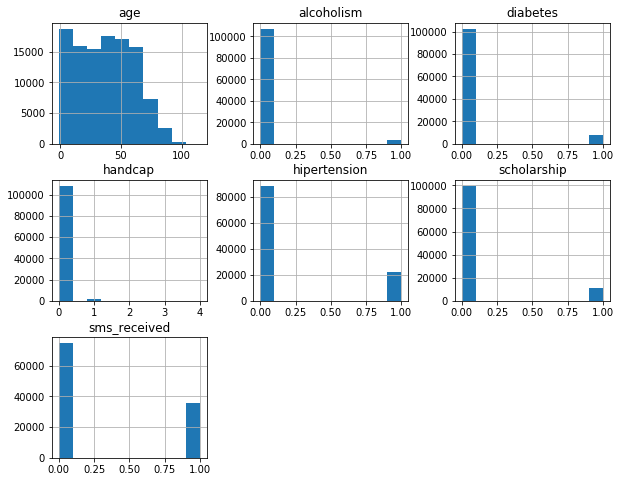

In [9]:
#visualize each variable using Histogram in a dataset

df.hist(figsize=(10,8));

The charts above show different variables from age of the patients, alcoholism, diabetes, handcap, hipertension, scholarshio, sms received. The chart shows that the age of the patients is skewed to the right i.e the mean is greater that the median and the median is greater than the mode. The plot also shows that very few people with those illness. More patients got sms than scholarships.

,age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


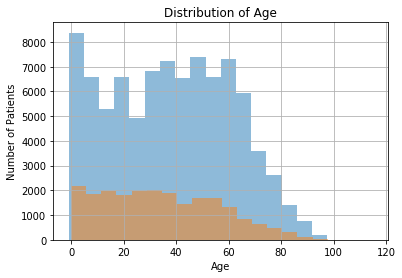

In [10]:
ax = df.age[df.no_show == "No"].hist(alpha=0.5, bins=20, label='Present')
ax = df.age[df.no_show == "Yes"].hist(alpha=0.5, bins=20, label='Absent')
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age')
pd.DataFrame(df['age'].describe())

In [ ]:
Histogram showing the distribution of Age

,scholarship
count,110527.000000
mean,0.098266
std,0.297675
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


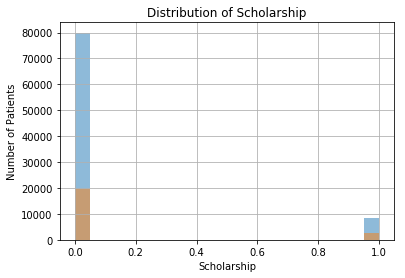

In [11]:
#check scholarship column to analyse when patients show up and didnt show up for appointment 

bx = df.scholarship[df.no_show == "No"].hist(alpha=0.5, bins=20, label='Present')
bx = df.scholarship[df.no_show == "Yes"].hist(alpha=0.5, bins=20, label='Absent')
bx.set_ylabel('Number of Patients')
bx.set_xlabel('Scholarship')
bx.set_title('Distribution of Scholarship')
pd.DataFrame(df['scholarship'].describe())

The graph above is showing the distribution of data for patients that are enrolled for the welfare. The blue color indicates patients that showed up for their appointment date while the brown color shows the distribution of patients that didnt show up for their appointment. From the graph, very few received scholarship and amongs them, a higher percentage showed up for their appointment. 

,sms_received
count,110527.000000
mean,0.321026
std,0.466873
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


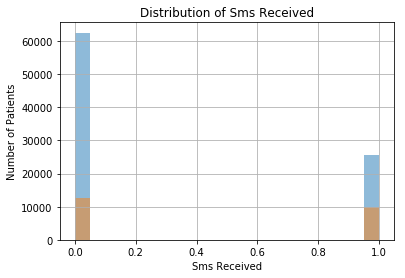

In [12]:
#check sms_received column to analyse if a patients showed up and didnt show up for appointment due to sms received

cx = df.sms_received[df.no_show == "No"].hist(alpha=0.5, bins=20, label='Present')
cx = df.sms_received[df.no_show == "Yes"].hist(alpha=0.5, bins=20, label='Absent')
cx.set_ylabel('Number of Patients')
cx.set_xlabel('Sms Received')
cx.set_title('Distribution of Sms Received')
pd.DataFrame(df['sms_received'].describe())

The graph above is showing the distribution of data for patients that received sms for their appointment. The blue color indicates patients that showed up for their appointment date while the brown color shows the distribution of patients that didnt show up for their appointment. From the graph, a number of patients received sms and amongs them, a higher percentage showed up for their appointment.

,gender
count,110527
unique,2
top,F
freq,71840


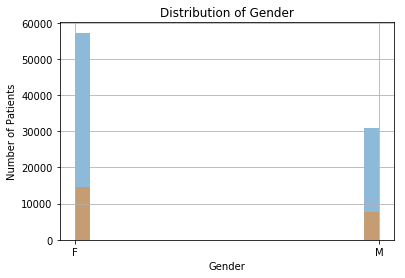

In [13]:
#check gender column to analyse the gender that showed up and didnt show up for appointment

dx = df.gender[df.no_show == "No"].hist(alpha=0.5, bins=20, label='Present')
dx = df.gender[df.no_show == "Yes"].hist(alpha=0.5, bins=20, label='Absent')
dx.set_ylabel('Number of Patients')
dx.set_xlabel('Gender')
dx.set_title('Distribution of Gender')
pd.DataFrame(df['gender'].describe())

The graph above is showing the distribution of data depending on their gender. I want to examine which gender visits the hospital more for their appointment. The blue color indicates patients that showed up for their appointment date while the brown color shows the distribution of patients that didnt show up for their appointment. From the graph, more female patients showed up for their appointment than male. 

In [14]:
#check the mean for each varialbe groupby no show

df.groupby('no_show').mean()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,,,
No,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
Yes,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371


In [15]:
#check the average of variable group by gender

df.groupby('gender').mean()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
gender,,,,,,,
F,38.893987,0.123232,0.213516,0.078035,0.017024,0.019543,0.336888
M,33.736863,0.051904,0.167033,0.060408,0.055238,0.027270,0.291571


In [16]:
#group the gender and the no show column and check their average

df.groupby(['gender', 'no_show']).mean()

age  scholarship  hipertension  diabetes  alcoholism  \
gender no_show                                                               
F      No       39.590417     0.117860      0.221535  0.080163    0.015984   
       Yes      36.162190     0.144306      0.182061  0.069686    0.021105   
M      No       34.461372     0.049609      0.172696  0.062141    0.057102   
       Yes      30.833010     0.061100      0.144337  0.053463    0.047767   

                 handcap  sms_received  
gender no_show                          
F      No       0.019792      0.305384  
       Yes      0.018569      0.460463  
M      No       0.028196      0.265358  
       Yes      0.023560      0.396634

In [17]:
#check for the median of the patients age that showed up and dont show up for their appointments

print(df.age.median())
print(df.query('no_show == "No"')['age'].median())
df.query('no_show == "Yes"')['age'].median()

37.0
38.0


33.0

no_show
No     25698
Yes     9784
Name: sms_received, dtype: int64

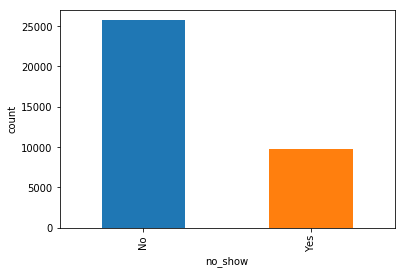

In [18]:
#check using bar chart of the patients that showed up for their appointments using sms

df.groupby('no_show').sms_received.sum().plot(kind='bar').set_ylabel('count');
df.groupby('no_show').sms_received.sum()

The bar chart above is shows the count of people that received sms and comparing it to the patients that showed up and didnt showed up for their appointments.

In [19]:
#checks the total no of scholarships given and patients that showed up and didnt show up for their appointments

print(df.scholarship.sum())
print(df.query('no_show == "No"')['scholarship'].sum())
df.query('no_show == "Yes"')['scholarship'].sum()

10861
8283


2578

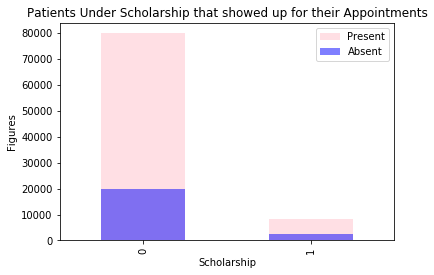

In [20]:
#bar chart showing the relationship of people that showed up for their appointments with scholarship

df.scholarship[df.no_show == "No"].value_counts().plot(kind='bar',alpha=0.5, color= 'pink', label='Present')
df.scholarship[df.no_show == "Yes"].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Absent')
plt.title('Patients Under Scholarship that showed up for their Appointments')
plt.xlabel('Scholarship')
plt.ylabel('Figures')
plt.legend();

Above is a bar chart showing patients that are enrolled for the scholarship and it also alight those that showed up and those that didnt show up for their appointment. We can see clearly that patients that are enrolled in the scholarship are few and a greater amount of them showed up for their appointment compareed to the patients that didnt go while enrolled.

In [21]:
#checks the total no of patients that received sms and the no that showed up and didnt show up for their appointments

print(df.sms_received.sum())
print(df.query('no_show == "No"')['sms_received'].sum())
df.query('no_show == "Yes"')['sms_received'].sum()

35482
25698


9784

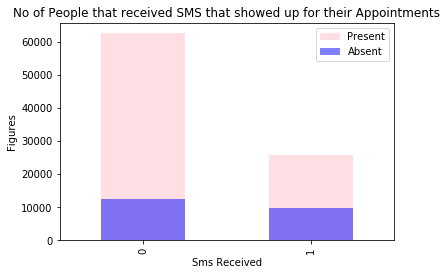

In [22]:
#bar chart showing the relationship of people that showed up for their appointments based on sms reveived

df.sms_received[df.no_show == "No"].value_counts().plot(kind='bar',alpha=0.5, color= 'pink', label='Present')
df.sms_received[df.no_show == "Yes"].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Absent')
plt.title('No of People that received SMS that showed up for their Appointments')
plt.xlabel('Sms Received')
plt.ylabel('Figures')
plt.legend();

Above is a bar chart showing patients that received sms and it also alight those that showed up and those that didnt show up for their appointment. We can see clearly that patients that receive sms are few and a greater amount of them showed up for their appointment compareed to the patients that didnt go while and received sms.

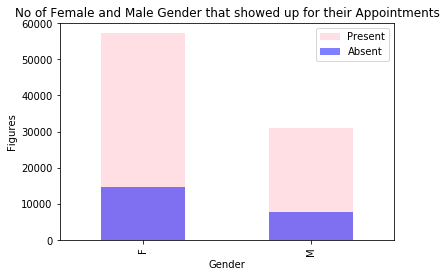

In [23]:
#bar chart showing the relationship of gender that showed up for their appointments 

df.gender[df.no_show == "No"].value_counts().plot(kind='bar',alpha=0.5, color= 'pink', label='Present')
df.gender[df.no_show == "Yes"].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Absent')
plt.title('No of Female and Male Gender that showed up for their Appointments')
plt.xlabel('Gender')
plt.ylabel('Figures')
plt.legend();

Above is a bar chart showing the gender that that showed up and those that didnt show up for their appointment the most. We can see clearly that the female gender showed up for their appointment more compareed to the male gender. From the statistics, it shows that male are more prone to the illness than female. I thik they should be encouraged more to go for their appointments.

### Research Question 2  Does their neighboourhood affect their inability to show up for their appointments?

In [24]:
#checks for the unique value of the total neighbourhood in the dataset

df.neighbourhood.nunique()

81

In [24]:
#checks the sum of patients that didnt go for their appointment in their nieghbourhood

df.query('no_show == "Yes"')['neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
JESUS DE NAZARETH               696
JARDIM DA PENHA                 631
CARATOÍRA                       591
TABUAZEIRO                      573
BONFIM                          550
ILHA DO PRÍNCIPE                532
ANDORINHAS                      521
SÃO PEDRO                       515
SANTO ANDRÉ                     508
SANTA MARTHA                    496
SANTO ANTÔNIO                   484
ROMÃO                           474
GURIGICA                        456
JABOUR                          451
DA PENHA                        429
SÃO JOSÉ                        428
MARUÍPE                         424
NOVA PALESTINA                  402
BELA VISTA                      384
SANTOS DUMONT                   369
SÃO CRISTÓVÃO                   363
ILHA DE SANTA MARIA             361
FORTE SÃO JOÃO              

In [25]:
#checks the sum of patients that went for their appointment in their neighbourhood

df.query('no_show == "No"')['neighbourhood'].value_counts()

JARDIM CAMBURI         6252
MARIA ORTIZ            4586
RESISTÊNCIA            3525
JARDIM DA PENHA        3246
SANTA MARTHA           2635
CENTRO                 2631
ITARARÉ                2591
TABUAZEIRO             2559
SANTO ANTÔNIO          2262
BONFIM                 2223
JESUS DE NAZARETH      2157
SANTO ANDRÉ            2063
JABOUR                 2058
CARATOÍRA              1974
SÃO PEDRO              1933
NOVA PALESTINA         1862
DA PENHA               1788
ROMÃO                  1741
ANDORINHAS             1741
ILHA DO PRÍNCIPE       1734
GURIGICA               1562
SÃO JOSÉ               1549
FORTE SÃO JOÃO         1543
ILHA DE SANTA MARIA    1524
BELA VISTA             1523
MARUÍPE                1478
SÃO CRISTÓVÃO          1473
REDENÇÃO               1278
JOANA D´ARC            1169
SÃO BENEDITO           1152
                       ... 
DO CABRAL               472
SANTOS REIS             435
ESTRELINHA              432
SOLON BORGES            400
SANTA CLARA         

The analysis from the neighbourhood shows that people showed up for their appointment. The neighbourhood is not a determinant. the places with larger population could mean that the hospital is a specialized hospital or has more population than the rest. The figure of people that showed up for each appointments and those that didnt show up in theris neighbourhood isnt really significant. So their neighbourhood does not determine if a patient show up or not for his appointment. 

<a id='conclusions'></a>
## Limitations and Conclusions

### The limitations in this dataset:

The patients major complaint was just limited to hipertension, handcap, alcoholism and diabetes and the average age of patiets that go to the hospital is around 37 years. patients that face those illness are above 55 years of age. I feel the data would have contained more details about other complaint the patient do make or illness face with patients at an average age.
I will have a better analysis if other illness were available.

In plotting for my report, I used only bar chart and histogram. I think that scatter plot will do a better correlation if used too. 

### Conclusion: 
From my analysis, the factors that will enable a patient show up for his appointment:

Scholarship: It was observed that patients that is enrolled in Brasilian welfare program scholarships showed up for their scheduled appointments than patients that is not enrolled in Brasilian welfare program scholarships for their appointments.  Sms Received: It is also shown that patients that reveived sms appear to be present for their appointment than patients that do not receive sms.
Gender: The female gender showed up for their appointment on their scheduled day than the male gender. 

From my analysis, the different neighbourhoods didn't  affect a patient not showing up for their appointment. We have high number of patients that showed up for their appointment in their neighbourhood than patients that didnt show up for their appointment in their neighbourhood.
The female gender showed up for their appointment on their scheduled day than the male gender

If more patients are enrolled in the welfare program and patients receive sms for their appointment, this factors will enable more patients to show up for their schedule appintment. Male gender should also be encouraged to visit the hospital on their scheduled day. The statistics showed that more male gender are faced with the illness than the female gender.


## Submitting your Project 



In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0